In [36]:
#Importando Pandas e Numpy
import pandas as pd
import numpy as np

In [2]:
#Lendo os dados

df = pd.read_csv("./ifood-restaurants-february-2021.csv", sep= ",", header =0)

In [35]:
df.head(5)

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,name,paymentCodes,price_range,rating,tags,url
0,False,https://static-images.ifood.com.br/image/uploa...,Marmita,3.99,27,1.22,5300108,10.0,Cantina Arte & Sabor,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ CART::MCHT::100_DELIVE...,https://www.ifood.com.br/delivery/brasilia-df/...
1,False,https://static-images.ifood.com.br/image/uploa...,Açaí,7.99,61,4.96,5300108,10.0,Raruty Açaí Raiz,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/brasilia-df/...
2,False,https://static-images.ifood.com.br/image/uploa...,Bebidas,11.99,70,8.35,5300108,5.0,Toma na Kombi,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,0.0,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_6_L...,https://www.ifood.com.br/delivery/brasilia-df/...
3,False,https://static-images.ifood.com.br/image/uploa...,Carnes,16.49,63,6.35,5300108,20.0,Churrasquinho do Barriga´s,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/brasilia-df/...
4,False,https://static-images.ifood.com.br/image/uploa...,Brasileira,11.99,58,5.22,5300108,20.0,Prime Restaurante,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NOVO,https://www.ifood.com.br/delivery/brasilia-df/...


In [36]:
#Função importante que traz visão geral da base, com quantidade geral, quantidades de entradas por categoria e o tipo de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406399 entries, 0 to 406398
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   availableForScheduling  406399 non-null  bool   
 1   avatar                  406122 non-null  object 
 2   category                406399 non-null  object 
 3   delivery_fee            406399 non-null  float64
 4   delivery_time           406399 non-null  int64  
 5   distance                406399 non-null  float64
 6   ibge                    406399 non-null  int64  
 7   minimumOrderValue       406399 non-null  float64
 8   name                    406399 non-null  object 
 9   paymentCodes            406397 non-null  object 
 10  price_range             406399 non-null  object 
 11  rating                  406399 non-null  float64
 12  tags                    406399 non-null  object 
 13  url                     406399 non-null  object 
dtypes: bool(1), float64(

In [3]:
#Para selecionar uma coluna, é possível utilizar a função "sel". Quando se trata de mais de uma coluna, é obrigatório utilizar dois colchetes. No caso abaixo, para facilitar o uso futuro, toda a seleção foi feita dentro da variável "df_sel".
df_sel = df[["name", "category", "delivery_fee", "distance", "delivery_time", "price_range"]]

In [4]:
#Para classificar os tipos de variáveis, utilizamos as fórmulas abaixo:
numericas = df.select_dtypes(include= ["number"]).columns.tolist()
categoricas = df.select_dtypes(include= ["object", "category", "bool"]).columns.tolist()

In [23]:
print("Variáveis Numéricas:", numericas)
print("Variáveis Categóricas: ", categoricas)

Variáveis Numéricas: ['delivery_fee', 'delivery_time', 'distance', 'ibge', 'minimumOrderValue', 'rating']
Variáveis Categóricas:  ['availableForScheduling', 'avatar', 'category', 'name', 'paymentCodes', 'price_range', 'tags', 'url']


In [5]:
#Como eu não tenho interesse em trabalhar com a variável "ibge" como numérica, vou retirá-la da minha lista
numericas.pop(3)
print(numericas)

['delivery_fee', 'delivery_time', 'distance', 'minimumOrderValue', 'rating']


In [64]:
#Função "describe": gera estatísticas rápidas e descritivas sobre sua base de dados. É um resumo estático para entender a tendência central, a dispersão e o formato de distribuição dos dados. Funciona apenas para variáveis numéricas.
df[numericas].describe()

,delivery_fee,delivery_time,distance,minimumOrderValue,rating
count,406399.000000,406399.000000,406399.000000,4.063990e+05,406399.000000
mean,6.804577,47.432747,4.219752,2.768909e+02,2.522241
std,4.315815,19.662736,68.329379,1.570668e+05,2.286103
min,0.000000,-1.000000,0.000000,0.000000e+00,0.000000
25%,4.000000,35.000000,1.750000,1.000000e+01,0.000000
50%,6.000000,45.000000,3.080000,1.500000e+01,3.958900
75%,9.490000,60.000000,4.830000,2.000000e+01,4.718750
max,35.000000,5050.000000,11810.190000,1.000000e+08,5.000000


Cálculo de moda - Função 'mode' - uso para variáveis 

In [65]:
#Uso da função "moda" (mode) - Caso 1
df_sel["name"].mode()

0    Sabor Caseiro
Name: name, dtype: object

In [66]:
#Uso da função "moda" (mode) - Caso 2
df_sel["category"].mode()

0    Lanches
Name: category, dtype: object

In [67]:
#Uso da função "moda" (mode) - Caso 3
df_sel["price_range"].mode()

0    CHEAPEST
Name: price_range, dtype: object

In [6]:
categoricas_sel = df_sel.select_dtypes(include= ["object", "category", "bool"]).columns.tolist()

In [87]:
#Avaliando as modas das variáveis categóricas

for variavel in categoricas_sel:
    contagens = df_sel[variavel].value_counts()

    if len(contagens) >= 5:
        print("~~~~~~~~~~~~~~~~~~~~~~")
        print(f"Variável {variavel}")
        print(f"Moda: {df_sel[variavel].mode()[0]}\n")
        print(f"{contagens.iloc[0:5]}\n")
    else:
        print("~~~~~~~~~~~~~~~~~~~~~~")
        print(f"Variável {variavel}")
        print(f"Moda: {df_sel[variavel].mode()[0]}\n")
        print(f"{contagens.iloc[0:len(contagens)]}\n")

~~~~~~~~~~~~~~~~~~~~~~
Variável name
Moda: Sabor Caseiro

name
Sabor Caseiro        186
Divino Sabor         132
Sabor de Casa        115
Doce Sabor           113
Cantinho do Sabor    103
Name: count, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~
Variável category
Moda: Lanches

category
Lanches          98946
Brasileira       73348
Doces & Bolos    39828
Pizza            36819
Açaí             22110
Name: count, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~
Variável price_range
Moda: CHEAPEST

price_range
CHEAPEST          294140
MODERATE           44769
CHEAP              43100
EXPENSIVE          15778
MOST_EXPENSIVE      8612
Name: count, dtype: int64



Cálculo de média - Função 'mean' - Variáveis numéricas

In [81]:
numericas

['delivery_fee', 'delivery_time', 'distance', 'minimumOrderValue', 'rating']

In [70]:
float(df_sel["distance"].mean())

4.219752189350859

In [71]:
float(df_sel["delivery_fee"].mean())

6.80457700437255

In [72]:
float(df_sel["delivery_time"].mean())

47.43274712782266

In [90]:
#Para calcular as variáveis de todas as numéricas, basta utilizar a categoria "numericas" criada anteriormente
numericas_sel = df_sel.select_dtypes(include= ["number"]).columns.tolist()
df_sel[numericas_sel].mean()

delivery_fee      6.804577
distance          4.219752
delivery_time    47.432747
dtype: float64

In [27]:
for variavel in numericas:
    print(f"Média Variável {variavel}: {float(df_sel[variavel].mean())}")

Média Variável delivery_fee: 6.80457700437255
Média Variável distance: 4.219752189350859
Média Variável delivery_time: 47.43274712782266


Cálculo de Mediana - Função 'median' - Variáveis numéricas

In [33]:
float(df_sel["delivery_fee"].median())

6.0

In [34]:
float(df_sel["distance"].median())

3.08

In [35]:
float(df_sel["delivery_time"].median())

45.0

In [42]:
df_sel[numericas].median()

delivery_fee      6.00
distance          3.08
delivery_time    45.00
dtype: float64

In [60]:
for variavel in numericas:
    print(f"Media ")

Media 
Media 
Media 
Media 
Media 


Cálculo estatístico de amplitude

In [57]:
#Função "describe": gera estatísticas rápidas e descritivas sobre sua base de dados. Resumo para entender a tendência central, a dispersão e o formato de distribuição dos dados. Funciona apenas para variáveis numéricas.
df[numericas].describe()

,delivery_fee,delivery_time,distance,minimumOrderValue,rating
count,406399.000000,406399.000000,406399.000000,4.063990e+05,406399.000000
mean,6.804577,47.432747,4.219752,2.768909e+02,2.522241
std,4.315815,19.662736,68.329379,1.570668e+05,2.286103
min,0.000000,-1.000000,0.000000,0.000000e+00,0.000000
25%,4.000000,35.000000,1.750000,1.000000e+01,0.000000
50%,6.000000,45.000000,3.080000,1.500000e+01,3.958900
75%,9.490000,60.000000,4.830000,2.000000e+01,4.718750
max,35.000000,5050.000000,11810.190000,1.000000e+08,5.000000


In [93]:
#Cálculo de amplitude, a partir de laço de repetição

for variavel in numericas:
    amplitude = df[variavel].max() - df[variavel].min()    
#Imprimindo o resultado
    print(f"A amplitude da variável {variavel} é:", amplitude)

A amplitude da variável delivery_fee é: 35.0
A amplitude da variável delivery_time é: 5051
A amplitude da variável distance é: 11810.19
A amplitude da variável minimumOrderValue é: 99999999.99
A amplitude da variável rating é: 5.0


Cálculo de Variância

In [ ]:
#Só pode ser calculada em variáveis numéricas. Utiliza-se a função "var"
df[numericas].var()

delivery_fee         1.862626e+01
delivery_time        3.866232e+02
distance             4.668904e+03
minimumOrderValue    2.466997e+10
rating               5.226266e+00
dtype: float64

Cálculo de Desvio Padrão

In [96]:
#Só pode ser calculada em variáveis numéricas. Utiliza-se a função "std" (standard variation)
df[numericas].std()

delivery_fee              4.315815
delivery_time            19.662736
distance                 68.329379
minimumOrderValue    157066.758573
rating                    2.286103
dtype: float64

Cálculo de variância e desvio padrão para todas as variáveis

In [102]:
variancia = df[numericas].var()
desvio = df[numericas].std()

print("Variancia")
print(variancia)
print("\nDesvio Padrão")
print(desvio)

Variancia
delivery_fee         1.862626e+01
delivery_time        3.866232e+02
distance             4.668904e+03
minimumOrderValue    2.466997e+10
rating               5.226266e+00
dtype: float64

Desvio Padrão
delivery_fee              4.315815
delivery_time            19.662736
distance                 68.329379
minimumOrderValue    157066.758573
rating                    2.286103
dtype: float64


In [ ]:
#Importante: a função "describe" já traz em si o desvio padrão (std) de forma automática
df[numericas].describe()

,delivery_fee,delivery_time,distance,minimumOrderValue,rating
count,406399.000000,406399.000000,406399.000000,4.063990e+05,406399.000000
mean,6.804577,47.432747,4.219752,2.768909e+02,2.522241
std,4.315815,19.662736,68.329379,1.570668e+05,2.286103
min,0.000000,-1.000000,0.000000,0.000000e+00,0.000000
25%,4.000000,35.000000,1.750000,1.000000e+01,0.000000
50%,6.000000,45.000000,3.080000,1.500000e+01,3.958900
75%,9.490000,60.000000,4.830000,2.000000e+01,4.718750
max,35.000000,5050.000000,11810.190000,1.000000e+08,5.000000


Criando Boxplots

In [7]:
#Para criar visualizações com gráficos, usa-se o matplotlib
import matplotlib.pyplot as plt

In [24]:
#Para boxplots, apenas variáveis numéricas são utilizadas. Esse grupo já tinha sido criado anteriormente.
numericas

['delivery_fee',
 'delivery_time',
 'distance',
 'ibge',
 'minimumOrderValue',
 'rating']

In [8]:
#Para este caso, a variável "ibge" não faz sentido, então deve ser retirada
numericas.pop(3)

print(numericas)

['delivery_fee', 'delivery_time', 'distance', 'rating']


C:\Users\USARIO-1\AppData\Local\Temp\ipykernel_5056\1658012855.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df["delivery_time"], labels = ["Tempo de entrega"])


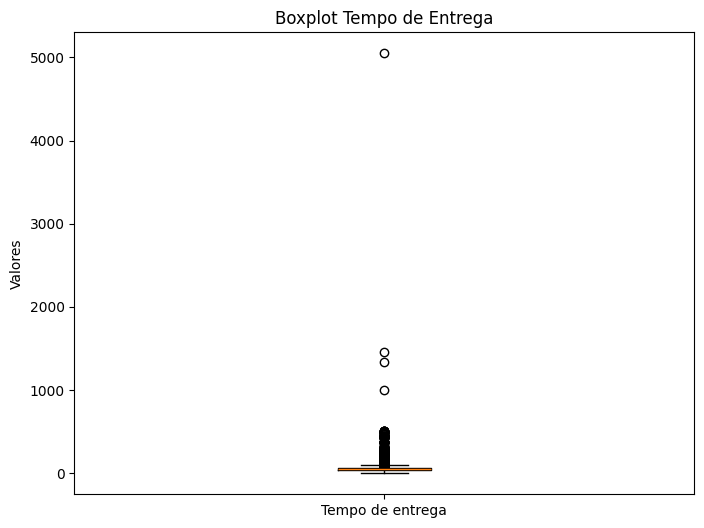

In [32]:
#configurando o gráfico boxplot
plt.figure(figsize =(8,6))
plt.boxplot(df["delivery_time"], labels = ["Tempo de entrega"])
plt.title("Boxplot Tempo de Entrega")
plt.ylabel("Valores")
plt.show()

In [9]:
#O gráfico acima demonstra presença de outliers, bem acima dos valores médios. Será necessário retirá-los. Para isso, calcula-se primeiramente os quarties.
Q1 = df["delivery_time"].quantile(0.25)
Q3 = df["delivery_time"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

25.0


In [10]:
#Criação de conjunto de dados com os valores outliers
df_out = df[(((df["delivery_time"] < (Q1 - 1.5 * IQR))) | (df["delivery_time"] > (Q3 + 1.5 * IQR)))]

In [52]:
#Checagem do tamanho do conjunto, para verificar sua representatividade dentro do dataset
print(f"Quantidade de registros totais:", {len(df)})
print(f"Quantidade de registros outliers:", {len(df_out)})
print(f"Percentual de outliers: {np.round(100*len(df_out)/len(df), 0)} %")

Quantidade de registros totais: {406399}
Quantidade de registros outliers: {3857}
Percentual de outliers: 1.0 %


In [11]:
#Após perceber que apenas 1,0% dos dados são outliers, optou-se por retirá-los
df_sem_out = df[~(((df["delivery_time"] < (Q1 - 1.5 * IQR))) | (df["delivery_time"] > (Q3 + 1.5 * IQR)))]

C:\Users\USARIO-1\AppData\Local\Temp\ipykernel_2268\1469154998.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_sem_out["delivery_time"], labels = ["Tempo de entrega"])


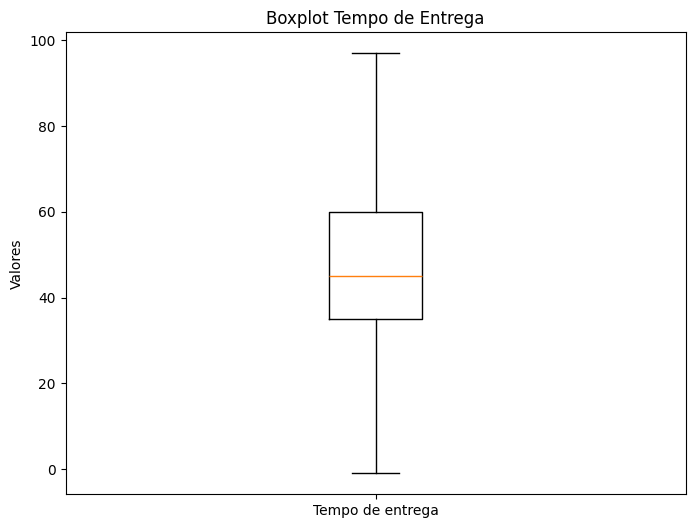

In [12]:
#configurando o gráfico boxplot sem outliers
plt.figure(figsize =(8,6))
plt.boxplot(df_sem_out["delivery_time"], labels = ["Tempo de entrega"])
plt.title("Boxplot Tempo de Entrega")
plt.ylabel("Valores")
plt.show()

Retirando outliers

In [15]:
#É necessário, neste caso, trabalhar com as variáveis numéricas.
numericas = df.select_dtypes(include = ["number"]).columns.tolist()
numericas

['delivery_fee',
 'delivery_time',
 'distance',
 'ibge',
 'minimumOrderValue',
 'rating']

In [16]:
#Retirar variável IBGE, pois não é realmente uma numérica
numericas.pop(3)

'ibge'

In [24]:
#A função "quantile" serve para determinar os valores abaixo de uma determinada porcentagem de valor dos dados. Para medir a dispersão e identificar outliers, é necessário calcular a diferença entre o quartil 3 e 1 (intervalo interquatil)
Q1 = df[numericas].quantile(0.25)
Q3 = df[numericas].quantile(0.75)


In [27]:
#Cálculo de intervalor interquartil de todas as variáveis numéricas
IQR = Q3 - Q1
IQR

delivery_fee          5.49000
delivery_time        25.00000
distance              3.08000
minimumOrderValue    10.00000
rating                4.71875
dtype: float64

In [ ]:
#Identificação de outliers
outliers_geral = df[((df[numericas] < (Q1 - 1.5 * IQR)) | (df[numericas] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [30]:
print(f"Quantidade de registros na base: {len(df)}")
print(f"Quantidade de outliers na base: {len(outliers_geral)}")
print(f"Percentual de outliers: {np.round(100*len(outliers_geral)/len(df), 0)} %")

Quantidade de registros na base: 406399
Quantidade de outliers na base: 14725
Percentual de outliers: 4.0 %


In [32]:
#Seleção do dataframe sem outliers
df_sem_out = df[~((df[numericas] < (Q1 - 1.5 * IQR)) | (df[numericas] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Quantidade de linhas do dataframe sem outliers: {len(df_sem_out)}")

Quantidade de linhas do dataframe sem outliers: 391674


In [33]:
#Seleção de colunas que serão utilizadas para as análises seguintes
columns_to_use = ["availableForScheduling",
    "category",
    "delivery_fee",
    "delivery_time",
    "distance",
    "minimumOrderValue",
    "price_range",
    "rating"
]

In [34]:
df_final = df_sem_out[columns_to_use]

In [37]:
#Código para salvar o dataframe sem outliers
df_final.to_csv("./base_ifood_limpa.csv", sep=";", header=True)